<a href="https://colab.research.google.com/github/sbbzplt/QWorld-Cobalt/blob/master/notebooks/Combinatorial_Optimization_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;">
        <img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/QWorld.png?raw=1"> </td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;">
        Prepared by <a href="https://gitlab.com/Sourabh499" target="_blank"> Sourabh Nutakki </a></td>
    </tr>
 </table>

<hr>

# Combinatorial Optimization Problems

Combinatorial Optimization is concerned with finding an optimal or close to optimal solution among a finite collection of possibilities. Such problems appear in the navigation system in cars, creating timetables for high schools, decision support systems in production and logistic environments, determining the optimal way to deliver packages etc. In many such problems, note that exhaustive search is not tractable for real-world problems. Now we'll proceed with some examples of combinatorial optimization problems.

## Travelling Salesman Problem

Given a set of cities and distance between every pair of cities, the problem is to find the shortest possible route such that a salesman visits every city exactly once and returns to the starting point.

The graph displayed below is an undirected graph and the cost of moving between two cities is the same for each direction. The graph may also be directed, in which case different costs may be assigned for each direction.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/tsp1.png?raw=1" width="250">

A path through a graph that visits each vertex(city) exactly once is called a <b>hamiltonian path</b> or a <b>hamiltonian cycle</b> if it is a closed path.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/Hamiltonian_path.svg?raw=1" width="250">

This problem is an NP-Hard problem. This means no efficient (polynomial-time) algorithm is known to find the optimal solution.

### Naive Algorithm (Brute-Force Method)

This approach considers all possible routes to determine the shortest unique solution. Even though this approach provides the optimal solution instead of an approximate, it is not feasible to use this method for problems involving a large number of cities.

Note that it is not important from which city you start your tour. The tours A-B-C-D-A and B-C-D-A-B refer to the the same tour. Hence one can fix the starting point when comparing the cost of all possible tours.

### Task 1

Find the shortest possible that passes through each city exactly once using the naive algorithm.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/tsp_1.png?raw=1" width="250">

[click for our solution](Combinatorial_Optimization_Problems_Solutions.ipynb#Task1)

## `networkx` package and visualizing graphs

One can use the `networkx` package in python to visualize graphs. We have also some builtin functions built upon `networkx` to help you visualize the solutions.

In the following cell, we define and draw the graph given above using `networkx`.

In [ ]:
!pip install dwave-ocean-sdk
!wget https://raw.githubusercontent.com/sbbzplt/QWorld-Cobalt/refs/heads/master/notebooks/bqm_utils.py

In [ ]:
import networkx as nx
from bqm_utils import graph_viz, tsp_viz, maxcut_viz

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from(
    [(0, 1, 12), (0, 2, 14), (0, 3, 17), (1, 2, 15), (1, 3, 18), (2, 3, 29)]
)
graph_viz(G)

Given a path in the form `[0,2,1,3]`, we can also visualize the path.

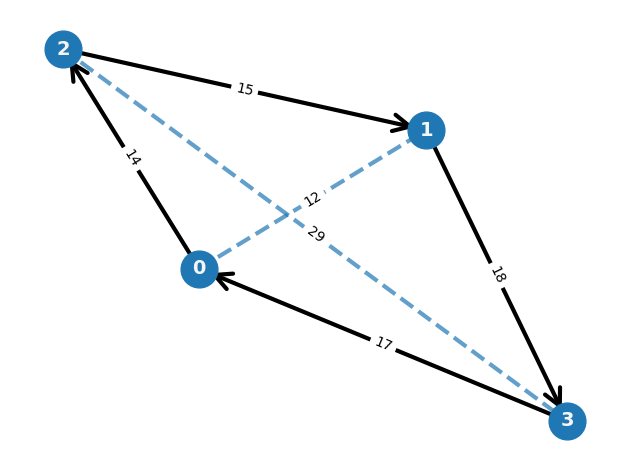

In [ ]:
path = [0,2,1,3]
tsp_viz(G, path)

---

## Graph Coloring Problem

Graph Coloring is the procedure of assignment of colors to each vertex of a graph such that no adjacent vertices get the same color. The objective is to minimize the number of colors. The smallest number of colors required to color a graph is called the <b>chromatic number</b> of the graph.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/gc1.png?raw=1" width="250">

This problem is a NP-Hard problem for general graphs. There is also a decision version of this problem which asks the question "Can this graph be colored using $k$ colors?", which is NP-Complete for $k\geq 3$.

### Visualization

You can use the visualization tool we have created by defining the colors of the nodes as a dictionary and calling `graph_coloring_viz` function.

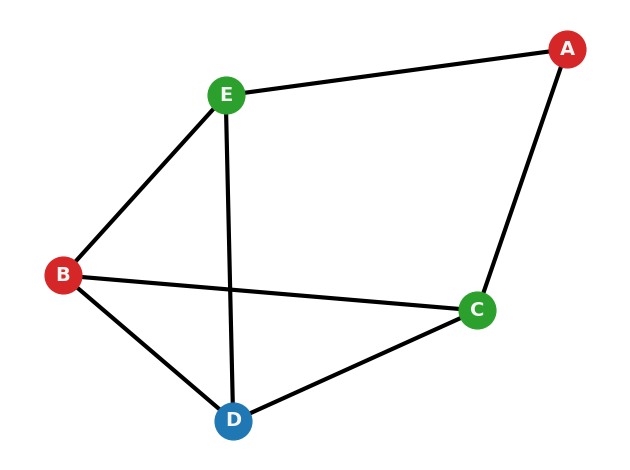

In [ ]:
import bqm_utils
import networkx as nx

G = nx.Graph()
edges = [
    ("A", "C"),
    ("A", "E"),
    ("B", "C"),
    ("B", "E"),
    ("B", "D"),
    ("C", "D"),
    ("D", "E"),
]
G.add_edges_from(edges)

coloring = {"A": "R", "B": "R", "C": "G", "D": "B", "E": "G"}
bqm_utils.graph_coloring_viz(G, coloring)

You can also input numbers instead of color.

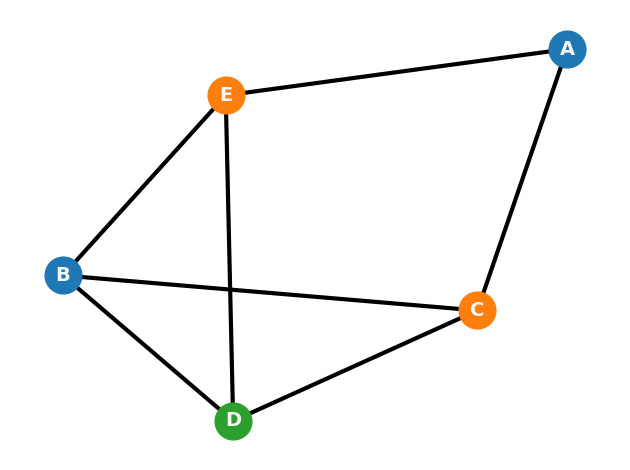

In [ ]:
coloring = {"A": 0, "B": 0, "C": 1, "D": 2, "E": 1}
bqm_utils.graph_coloring_viz(G, coloring)

### Greedy Approach

The naive approach would be to check all color assignments one by one, by increasing the number of colors. There is a greedy approach which provides not an optimal always but an approximate solution. Initially, we put the vertices and colors in some arbitrary order. Then, we start with the first vertex and color it with the first color. We move on to the next vertex and color it with the lowest numbered color that is available e.g. no adjacent vertex is colored using the same color. We repeat this procedure until all the vertices are colored.

<div class="alert alert-block alert-info">
Note that different orderings may give different results.
</div>



### Task 2

Use greedy coloring with the order of the vertices A, B, E, F, G, H, C, I, J, D and the colors in order Red, Blue and Green. Can you color the graph using three colors?

Note: If `networkx` package is used for the task, it is fine if the output graph doesn't look the same as long as the edges and vertices are correct.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/gc5.png?raw=1" width="250">

[click for our solution](Combinatorial_Optimization_Problems_Solutions.ipynb#Task2)

### Task 3

Use greedy coloring with the order of the vertices A, H, I, B, E, J, G, F, C, D and the colors in order Red, Blue and Green. Can you color the graph using three colors?

Note: If `networkx` package is used for the task, it is fine if the output graph doesn't look the same as long as the edges and vertices are correct.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/gc5.png?raw=1" width="250">

[click for our solution](Combinatorial_Optimization_Problems_Solutions.ipynb#Task3)

Task 3 shows that the greedy approach does not always yield optimal solution, as we have already seen in Task 2 that it is possible to color the given graph using only 3 colors.

### Task 4 (Optional)

Can you provide a lower bound on the chromatic number of a graph?

[click for our solution](Combinatorial_Optimization_Problems_Solutions.ipynb#Task4)

---

## Max-Cut

Given a graph, the aim is to partition the vertices of the graph into two disjoint sets (which is called a <b>cut</b>) such that the number of edges between the two sets is maximal. The size of the cut is defined as the number of edges between two sets.

In the graph given below, the vertices colored in black and white form the two sets.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/max__cut_1.png?raw=1" width="250">

The Max-Cut problem is NP-hard in general, but for some special graphs, it can be solved efficiently.

Let us consider again the following graph.

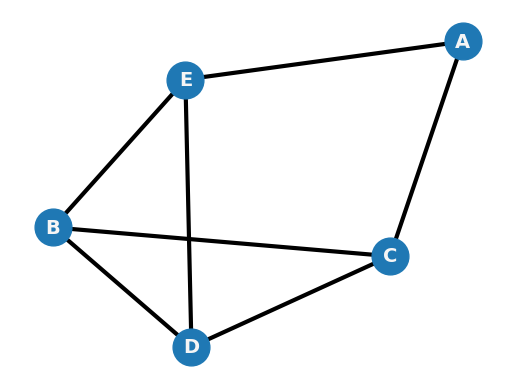

In [ ]:
G = nx.Graph()
edges = [
    ("A", "C"),
    ("A", "E"),
    ("B", "C"),
    ("B", "E"),
    ("B", "D"),
    ("C", "D"),
    ("D", "E"),
]
G.add_edges_from(edges)
graph_viz(G)

We can visualize a cut by specifying the vertices in one of the sets. Say we have the sets $U=\{'A','B'\}$ and $\{'C','D,'E'\}$. The edges in the cut are displayed with dashed lines. There are 5 edges in the cut.

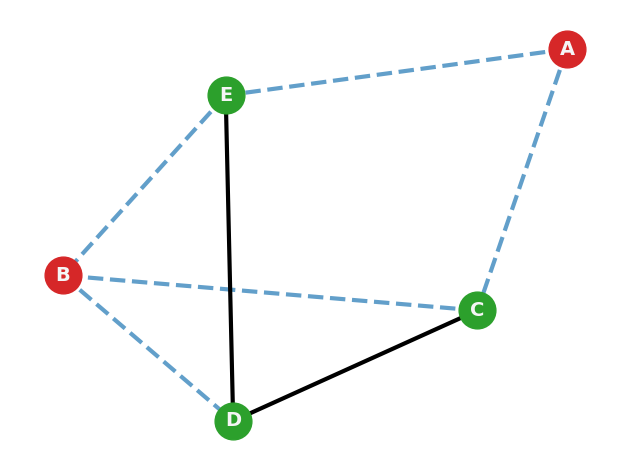

In [ ]:
U = ['A', 'B']
maxcut_viz(G, U)

### A simple case

A bipartite graph is a graph whose vertices can be divided into two independent sets $U$ and $V$ (there exist no edge within $U$ and $V$) such that every edge $(u, v)$ connects vertices from $U$ and $V$. Hence, in this case, since all of the adjacent vertices are in different sets, the solution to the Max-Cut problem is simply the total number of edges.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/bipartite_graph_1.jpg?raw=1" width="250">

Deciding whether a graph is bipartite or not can be accomplished in polynomial time. Hence the solution to the Max-Cut problem in this case can be found efficiently.

### Task 5

Solve the Max-Cut problem for the given graph.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/bipartite_graph_2.png?raw=1" width="250">

[click for our solution](Combinatorial_Optimization_Problems_Solutions.ipynb#Task5)

### Task 6
In the given graph, the maximum cut is shown. Determine the number of edges in the cut.

<img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/max_cut_3.png?raw=1" width="250">

[click for our solution](Combinatorial_Optimization_Problems_Solutions.ipynb#Task6)